# Anomaly Detection



Anubhav gupta
Implement the anomaly detection algorithm 
Apply it to detect failing servers on a network.

https://medium.com/srm-mic/machine-learning-for-anomaly-detection-the-mathematics-behind-it-7a2c3b5a755

# Detail of Implementation of Algo

Implement an anomaly detection algorithm to detect anomalous behavior in server computers. The features measure the throughput (mb/s) and latency (ms) of response of each server. While your servers were operating, you collected $m = 307$ examples of how they were behaving, and thus have an unlabeled dataset $\{x^{(1)}, \dots, x^{(m)}\}$. You suspect that the vast majority of these examples are “normal” (non-anomalous) examples of the servers operating normally, but there might also be some examples of servers acting anomalously within this dataset.
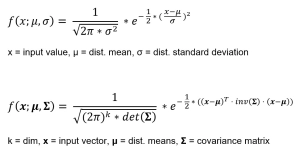

You will use a Gaussian model to detect anomalous examples in your dataset. You will first start on a 2D dataset that will allow you to visualize what the algorithm is doing. On that dataset you will fit a Gaussian distribution and then find values that have very low probability and hence can be considered anomalies. After that, you will apply the anomaly detection algorithm to a larger dataset with many dimensions.


###  Gaussian distribution

To perform anomaly detection, you will first need to fit a model to the data's distribution. Given a training set $\{x^{(1)}, \dots, x^{(m)} \}$ (where $x^{(i)} \in \mathbb{R}^n$ ), you want to estimate the Gaussian distribution for each of the features $x_i$ . For each feature $i = 1 \dots n$, you need to find parameters $\mu_i$ and $\sigma_i^2$  that fit the data in the $i^{th}$ dimension $\{ x_i^{(1)}, \dots, x_i^{(m)} \}$ (the $i^{th}$ dimension of each example).

The Gaussian distribution is given by

$$ p\left( x; \mu, \sigma^2 \right) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}},$$
where $\mu$ is the mean and $\sigma^2$ is the variance.

<a id="section1"></a>
### Estimating parameters for a Gaussian 

Estimate the parameters $\left( \mu_i, \sigma_i^2 \right)$, of the $i^{th}$ feature by using the following equations. To estimate the mean, you will use: 

$$ \mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)},$$

and for the variance you will use:

$$ \sigma_i^2 = \frac{1}{m} \sum_{j=1}^m \left( x_i^{(j)} - \mu_i \right)^2.$$
<a id="section2"></a>
### Selecting the threshold, $\varepsilon$

For this, we will use a cross validation set $\{ (x_{cv}^{(1)}, y_{cv}^{(1)}), \dots, (x_{cv}^{(m_{cv})}, y_{cv}^{(m_{cv})})\}$, where the label $y = 1$ corresponds to an anomalous example, and $y = 0$ corresponds to a normal example. For each cross validation example, we will compute $p\left( x_{cv}^{(i)}\right)$. The vector of all of these probabilities $p\left( x_{cv}^{(1)}\right), \dots, p\left( x_{cv}^{(m_{cv})}\right)$ is passed to `selectThreshold` in the vector `pval`. The corresponding labels $y_{cv}^{(1)} , \dots , y_{cv}^{(m_{cv})}$ are passed to the same function in the vector `yval`.

The $F_1$ score is computed using precision ($prec$) and recall ($rec$):

$$ F_1 = \frac{2 \cdot prec \cdot rec}{prec + rec}, $$

You compute precision and recall by: 

$$ prec = \frac{tp}{tp + fp}  $$ 

$$ rec = \frac{tp}{tp + fn} $$

where: 

- $tp$ is the number of true positives: the ground truth label says it’s an anomaly and our algorithm correctly classified it as an anomaly.

-  $fp$ is the number of false positives: the ground truth label says it’s not an anomaly, but our algorithm incorrectly classified it as an anomaly.
- $fn$ is the number of false negatives: the ground truth label says it’s an anomaly, but our algorithm incorrectly classified it as not being anomalous.


<a id="selectThreshold"></a>


## Note Point in above link
Choosing what features to use
As previously discussed, we assume that all features containing a particular number of examples follow Gaussian Distribution. But this is applicable for only ideal cases. In real world datasets, there are a large number of features to be chosen from. All these features might not follow this distribution. So, it is very important to choose only those features that do follow a Gaussian Distribution. We can either choose them directly after plotting their graphs or we can transform the Non-Gaussian features and the examples under it in such a way that the transformed feature with its examples follow our distribution.
For example, if a particular feature x(j) does not give us a Gaussian Distribution, we can transform it by either squaring it(x(j)²) or by taking its logarithmic value(log(x(j)) to get a graph that is Gaussian.


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat # for import .mat file
# %matplotlib notebook

<class 'dict'>


Text(0, 0.5, 'Throughput (mb/s)')

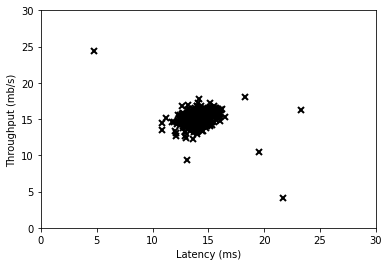

In [39]:
data=loadmat('ex8data1.mat')
# print(data)
X, Xval, yval = data['X'], data['Xval'], data['yval'][:, 0]
print(type(data))
#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bx', mew=2, mec='k', ms=6)
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
# print(yval)

In [40]:
def estimateGaussian(X):
    
    m, n = X.shape
    mu = np.zeros(n)
    sigma2 = np.zeros(n)
    mu = (1 / m) * np.sum(X, axis = 0)
    sigma2 = (1 / m) * np.sum((X - mu) ** 2, axis = 0)
    return mu, sigma2

In [41]:
def multivariateGaussian(X, mu, sigma2):
    
    print(X.shape)
    k = mu.size
    Sigma2=sigma2
    print(k,sigma2)
    if Sigma2.ndim == 1:
        Sigma2 = np.diag(Sigma2)
    print(Sigma2)
    X = X - mu
    p = (2 * np.pi) ** (- k / 2) * np.linalg.det(Sigma2) ** (-0.5)* np.exp(-0.5 * np.sum(np.dot(X, np.linalg.pinv(Sigma2)) * X, axis=1))
    return p

In [42]:
def selectThreshold(yval, pval):
    
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
#     print(pval.shape)
    for epsilon in np.linspace(1.01*min(pval), max(pval), 1000):
        
#         print(pval.shape)
        predictions = (pval < epsilon)
        tp = np.sum((predictions == yval) & (yval == 1))
        fp = np.sum((predictions == 1) & (yval == 0))
        fn = np.sum((predictions == 0) & (yval == 1))
        
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        
        F1 = 2 * prec * rec / (prec + rec)

        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon

    return bestEpsilon, bestF1

In [43]:
#  Estimate my and sigma2
# mu, sigma2 = estimateGaussian(X)
# print(mu,sigma2)
# print(X.shape,mu.shape,sigma2.shape)
# visualizeFit(X,  mu, sigma2)
# plt.xlabel('Latency (ms)')
# plt.ylabel('Throughput (mb/s)')
# plt.tight_layout()

(307, 2)
2 [1.83263141 1.70974533]
[[1.83263141 0.        ]
 [0.         1.70974533]]
(307,)
8.999852631901394e-05 0.8750000000000001
(307, 2)
2 [1.83263141 1.70974533]
[[1.83263141 0.        ]
 [0.         1.70974533]]


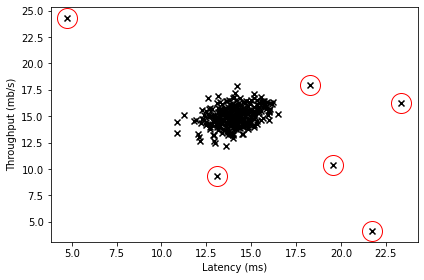

In [44]:
pval = multivariateGaussian(Xval, mu, sigma2)
print(pval.shape)
epsilon, F1 = selectThreshold(yval, pval)
print(epsilon,F1)
#  Find the outliers in the training set and plot the
p = multivariateGaussian(X, mu, sigma2)

outliers = p < epsilon

#  Visualize the fit
plt.scatter(X[:, 0], X[:, 1], c='k',marker='x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.tight_layout()

#  Draw a red circle around those outliers
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', markersize=20, markerfacecolor='None', markeredgewidth=1)

In [9]:
# STEP FOR HIGH DIMENSIONAL

# data = loadmat('ex8data2.mat')
# X, Xval, yval = data['X'], data['Xval'], data['yval'][:, 0]
# mu, sigma2 = estimateGaussian(X) 
# p = multivariateGaussian(X, mu, sigma2)
# pval = multivariateGaussian(Xval, mu, sigma2)
# epsilon, F1 = selectThreshold(yval, pval)
